## PROJECT 3 - WORLD HAPPINESS 2019

### Visualizing the happiness features relationship to happiness score for 156 countries.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [3]:
file_name="Resources/clean_2019.csv"
clean_2019=pd.read_csv(file_name, index_col=0)
clean_2019.head()

,overall_rank,country,happiness_score,gdp_per_capita,social_support,healthy_life_expectancy,freedom_choice,generosity,perceptions_of_corruption,happy_nothappy
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393,happy
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410,happy
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341,happy
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118,happy
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298,happy


The above columns: gdp_per_capita, social_support, healthy_life_expectancy, freedom_choice, generosity, and perceptions_of_corruption describe the extent to which these factors contribute in evaluating the happiness in each country. (from Kaggle)

## Visualize data using Seaborn

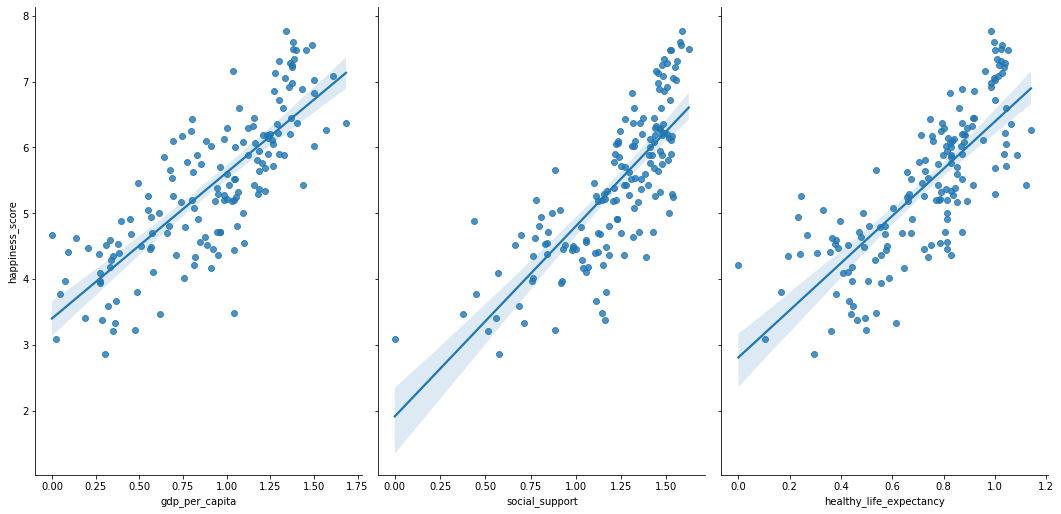

In [4]:
# Visualizing data using Seaborn
# Features - X, gdp, social support, healthy life expectancy
# Response - y which is "happiness_score"

# Visualize the relationship between the features and the response using scatterplots
# Plot shows line of best fit and a 95% confidence band

strong_features = sns.pairplot(clean_2019, x_vars=["gdp_per_capita", "social_support", "healthy_life_expectancy"], y_vars="happiness_score",
                                height=7, aspect=.7, kind="reg")

strong_features.savefig("Images/strong_features.png")

### Visualize the relationship between the features and the response using scatterplots

There is a strong linear relationship for 3 features with the happiness_score: 
- gdp_per_capita (Gross Domestic Product per Capita)
- social_support
- healthy_life_expectancy

As GDP per capita, social support and life expectancy increases, the happiness_score increases.

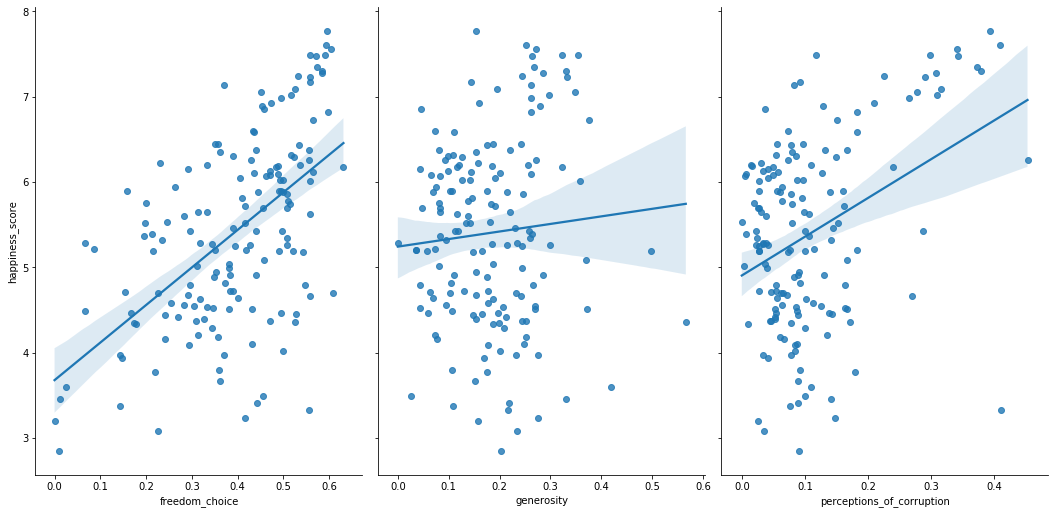

In [5]:
# Visualize the relationship between the features and the response using scatterplots

weak_features = sns.pairplot(clean_2019, x_vars=["freedom_choice", "generosity", "perceptions_of_corruption"], y_vars="happiness_score", 
             height=7, aspect=.7, kind="reg")

weak_features.savefig("Images/weak_features.png")

### Visualize the relationship between the features and the response using scatterplots.

There is less of a relationship or weaker relationship for the last 3 features with the happiness_score:
- freedom_choice
- generosity
- perceptions_of_corruption 

### Preparing X and y using pandas

In [6]:
# create python list of feature names
feature_columns = ['gdp_per_capita', 'social_support', 'healthy_life_expectancy', 
                   'freedom_choice', 'generosity', 'perceptions_of_corruption']

# use the list to select a subset of the original DataFrame
X = clean_2019[feature_columns]

# Equivalent command to do this in one line
#X = clean_2019[['gdp_per_capita', 'social_support', 'healthy_life_expectancy', 
#                   'freedom_choice', 'generosity', 'perceptions_of_corruption']]

# print the first 5 rows
X.head()

,gdp_per_capita,social_support,healthy_life_expectancy,freedom_choice,generosity,perceptions_of_corruption
0,1.340,1.587,0.986,0.596,0.153,0.393
1,1.383,1.573,0.996,0.592,0.252,0.410
2,1.488,1.582,1.028,0.603,0.271,0.341
3,1.380,1.624,1.026,0.591,0.354,0.118
4,1.396,1.522,0.999,0.557,0.322,0.298


In [7]:
# check the type and shape of X
type(X)
X.shape

(156, 6)

In [8]:
# select a Series from the DataFrame, response variable
y = clean_2019["happiness_score"]

# Equivalent command that works if there are no spaces in the column name
#y = clean_2019.happiness_score

# print the first 5 values
y.head()

0    7.769
1    7.600
2    7.554
3    7.494
4    7.488
Name: happiness_score, dtype: float64

In [9]:
y.tail()

151    3.334
152    3.231
153    3.203
154    3.083
155    2.853
Name: happiness_score, dtype: float64

In [10]:
# check the type and shape of y
type(y)
y.shape

(156,)

### Splitting X and y into training and testing sets

In [11]:
# split for modeling

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [12]:
# default split is 75% for training and 25% for testing

print (X_train.shape)
print (y_train.shape)
print (X_test.shape)
print (y_test.shape)

(117, 6)
(117,)
(39, 6)
(39,)


### Linear Regression

In [13]:
# import model
from sklearn.linear_model import LinearRegression

# instantiate
linreg = LinearRegression()

# fit the model to the training data (learn the coefficients)
linreg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

### Interpreting model coefficients

In [14]:
# print the intercept and coefficients
print('y-axis intercept: ', linreg.intercept_)
print('Weight coefficients: ', linreg.coef_)

y-axis intercept:  1.7078347009357668
Weight coefficients:  [0.73336324 1.19518003 1.12588987 1.41457795 0.35672311 1.43967756]


In [15]:
# pair the feature names with the coefficients
#zip(feature_columns, linreg.coef_)

### Making predictions

In [16]:
# make predictions on the testing set
y_pred = linreg.predict(X_test)

In [17]:
from sklearn.metrics import mean_squared_error, r2_score

In [18]:
# Compute MSE and R2 for happiness_score predictions

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2): {r2}")

Mean Squared Error (MSE): 0.23402957644765537
R-squared (R2): 0.7863696902483334


### Feature selection - Remove weaker features and recalculate MSE and R2 scores.

**Remove feature selection 'perceptions_of_corruption' and recalculate.**

In [19]:
# create a Python list of feature names

#feature_columns = ['gdp_per_capita', 'social_support', 'healthy_life_expectancy', 
#                   'freedom_choice', 'generosity', 'perceptions_of_corruption']

feature_cols = ['gdp_per_capita', 'social_support', 'healthy_life_expectancy', 
                   'freedom_choice', 'generosity']

# use the list to select a subset of the original DataFrame
X = clean_2019[feature_cols]

# select a Series from the DataFrame
y = clean_2019.happiness_score

# split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

# fit the model to the training data (learn the coefficients)
linreg.fit(X_train, y_train)

# make predictions on the testing set
y_pred = linreg.predict(X_test)

# compute the MSE and R2 of our predictions

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Result without feature preception_of_corruption:")
print("------------------------------------------------")
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2): {r2}")

Result without feature preception_of_corruption:
------------------------------------------------
Mean Squared Error (MSE): 0.21240549743648954
R-squared (R2): 0.8061088991439368


**Remove features 'generosity' and 'perceptions_of_corruption' and recalculate.**

In [20]:
# create a Python list of feature names

#feature_columns = ['gdp_per_capita', 'social_support', 'healthy_life_expectancy', 
#                   'freedom_choice', 'generosity', 'perceptions_of_corruption']

feature_cols = ['gdp_per_capita', 'social_support', 'healthy_life_expectancy', 
                   'freedom_choice']

# use the list to select a subset of the original DataFrame
X = clean_2019[feature_cols]

# select a Series from the DataFrame
y = clean_2019.happiness_score

# split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

# fit the model to the training data (learn the coefficients)
linreg.fit(X_train, y_train)

# make predictions on the testing set
y_pred = linreg.predict(X_test)

# compute the MSE and R2 of our predictions

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Result without features generosity and perception_of_corruption:")
print("----------------------------------------------------------------")
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2): {r2}")

Result without features generosity and perception_of_corruption:
----------------------------------------------------------------
Mean Squared Error (MSE): 0.2221552176644316
R-squared (R2): 0.7972090165568604


**Remove features 'freedom_choice', 'generosity', and 'perceptions_of_corruption' and recalculate.**

In [21]:
# create a Python list of feature names 

#feature_columns = ['gdp_per_capita', 'social_support', 'healthy_life_expectancy', 
#                   'freedom_choice', 'generosity', 'perceptions_of_corruption']

feature_cols = ['gdp_per_capita', 'social_support', 'healthy_life_expectancy']

# use the list to select a subset of the original DataFrame
X = clean_2019[feature_cols]

# select a Series from the DataFrame
y = clean_2019.happiness_score

# split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

# fit the model to the training data (learn the coefficients)
linreg.fit(X_train, y_train)

# make predictions on the testing set
y_pred = linreg.predict(X_test)

# compute the MSE and R2 of our predictions

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Result without features freedom_choice, generosity and perceptions_of_corruption:")
print("--------------------------------------------------------------------------------")
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2): {r2}")

Result without features freedom_choice, generosity and perceptions_of_corruption:
--------------------------------------------------------------------------------
Mean Squared Error (MSE): 0.26499435769985824
R-squared (R2): 0.7581039645622457


**Removing the feature 'perceptions_of_corruption' gets the best result.**

### Plot and Save Feature Images for HTML

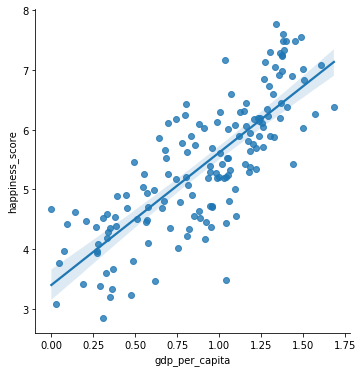

In [22]:
#strong_features = sns.pairplot(clean_2019, x_vars=["gdp_per_capita", "social_support", "healthy_life_expectancy"], y_vars="happiness_score",
#                                height=7, aspect=.7, kind="reg")

#weak_features = sns.pairplot(clean_2019, x_vars=["freedom_choice", "generosity", "perceptions_of_corruption"], y_vars="happiness_score", 
#             height=7, aspect=.7, kind="reg")


gdp = sns.pairplot(clean_2019, x_vars=["gdp_per_capita"], y_vars="happiness_score",
                                height=5, aspect=1, kind="reg")

gdp.savefig("Images/gdp.png")

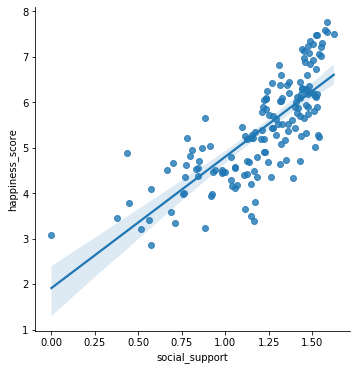

In [23]:
social_support = sns.pairplot(clean_2019, x_vars=["social_support"], y_vars="happiness_score",
                                height=5, aspect=1, kind="reg")

social_support.savefig("Images/social_support.png")

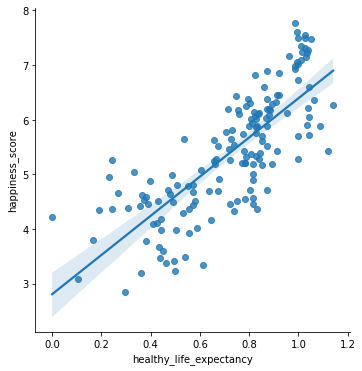

In [24]:
healthy_life = sns.pairplot(clean_2019, x_vars=["healthy_life_expectancy"], y_vars="happiness_score",
                                height=5, aspect=1, kind="reg")

healthy_life.savefig("Images/healthy_life.png")

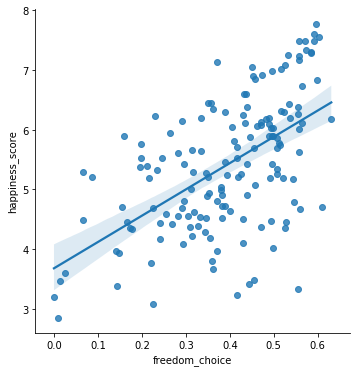

In [25]:
freedom = sns.pairplot(clean_2019, x_vars=["freedom_choice"], y_vars="happiness_score",
                                height=5, aspect=1, kind="reg")

freedom.savefig("Images/freedom.png")

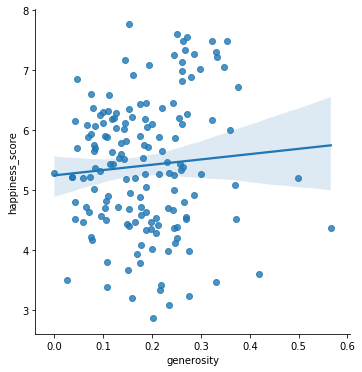

In [26]:
generosity = sns.pairplot(clean_2019, x_vars=["generosity"], y_vars="happiness_score",
                                height=5, aspect=1, kind="reg")

generosity.savefig("Images/generosity.png")

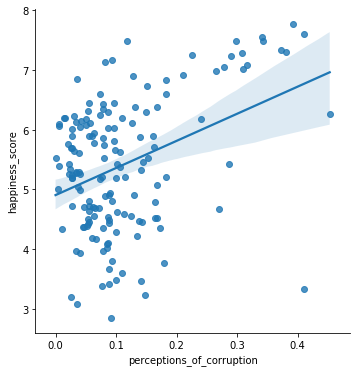

In [27]:
corruption = sns.pairplot(clean_2019, x_vars=["perceptions_of_corruption"], y_vars="happiness_score",
                                height=5, aspect=1, kind="reg")

corruption.savefig("Images/corruption.png")